In [11]:
import sqlite3
import datetime as dt
READINGS_DB = 'readings_apr.db'

In [4]:
con = sqlite3.connect(READINGS_DB)
cur = con.cursor()
q = cur.execute('select * from readings')
res = q.fetchall()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [7]:
df = pd.DataFrame.from_records(res)

In [9]:
df.columns = ["time", "ox","reducing","ammonia"]
df

,time,ox,reducing,ammonia
0,"time.struct_time(tm_year=2023, tm_mon=4, tm_md...",42688.294783,5735.045412,1654.284879
1,"time.struct_time(tm_year=2023, tm_mon=4, tm_md...",3538.480126,220.409560,303.913168
2,"time.struct_time(tm_year=2023, tm_mon=4, tm_md...",1986.703536,242.866925,220.409560
3,"time.struct_time(tm_year=2023, tm_mon=4, tm_md...",1560.007008,637.168142,223.616657
4,"time.struct_time(tm_year=2023, tm_mon=4, tm_md...",1422.512235,1162.742141,239.657632
...,...,...,...,...
399951,"time.struct_time(tm_year=2023, tm_mon=4, tm_md...",10036.850921,333411.299881,62589.820720
399952,"time.struct_time(tm_year=2023, tm_mon=4, tm_md...",10032.426638,333719.256623,62675.496689
399953,"time.struct_time(tm_year=2023, tm_mon=4, tm_md...",10032.426638,333565.217391,62604.091456
399954,"time.struct_time(tm_year=2023, tm_mon=4, tm_md...",10032.426638,333719.256623,62804.243009


In [13]:
def convert_time(t):
    t = t.split(', tm_wday=')[0]
    return dt.datetime.strptime(t, "time.struct_time(tm_year=%Y, tm_mon=%m, tm_mday=%d, tm_hour=%H, tm_min=%M, tm_sec=%S")

convert_time(res[0][0])

datetime.datetime(2023, 4, 15, 22, 55, 57)

In [14]:
df["time"] = df["time"].apply(lambda x: convert_time(x))

In [18]:
df

,ox,reducing,ammonia
time,,,
2023-04-15 22:55:57,42688.294783,5735.045412,1654.284879
2023-04-15 22:55:57,3538.480126,220.409560,303.913168
2023-04-15 22:55:57,1986.703536,242.866925,220.409560
2023-04-15 22:55:57,1560.007008,637.168142,223.616657
2023-04-15 22:55:57,1422.512235,1162.742141,239.657632
...,...,...,...
2023-04-16 15:49:44,10036.850921,333411.299881,62589.820720
2023-04-16 15:49:44,10032.426638,333719.256623,62675.496689
2023-04-16 15:49:44,10032.426638,333565.217391,62604.091456


In [17]:
df.set_index("time", inplace=True)


<Figure size 640x480 with 0 Axes>

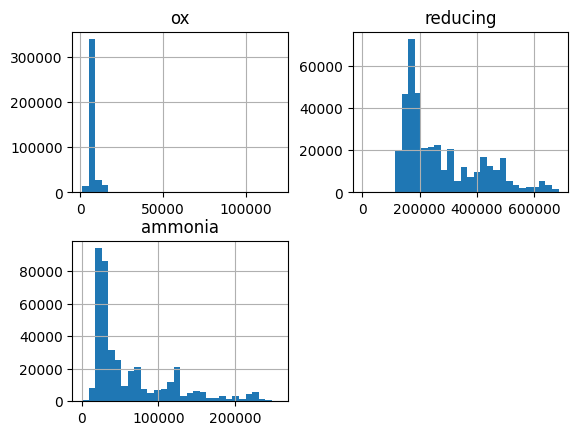

In [21]:
plt.clf()
df.hist(bins=30)
plt.show()


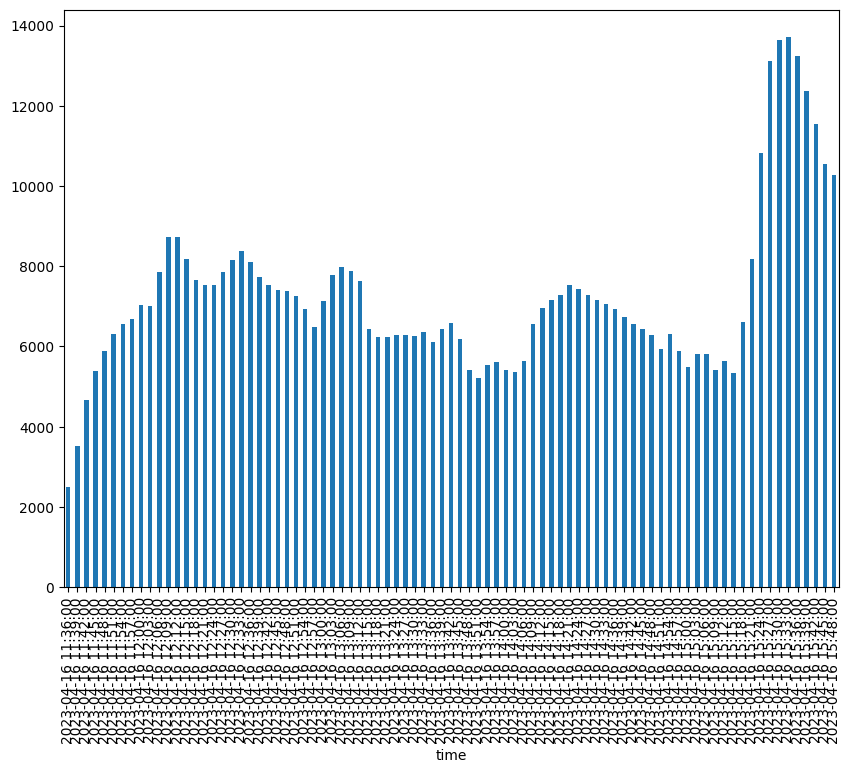

In [44]:
plt.clf()
plt.rcParams['figure.figsize'] = [10, 7.5]
df2 = df[df.index > dt.datetime(2023, 4, 16, 9, 0, 0)]["ox"]
df2.groupby(pd.Grouper(freq='3Min')).mean().plot(kind='bar')
plt.show()